# Bank Customer Deposit Predictions
Predicting whether a customer me make a deposit in the bank account or not using Decision Tree Classification algorithm.

## Importing Libraries

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier


# from sklearn.tree import export_graphviz
# from six import StringIO
# import pydotplus
# from IPython.display import Image

## Reading the data

In [2]:
bank_data=pd.read_csv('bank.csv')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### Terms

pdays: number of days since the customer was last called for marketing purpose..  -1 represents, never called

previous: How many times has the cutomer been called for marketing purpose.

## Checking for null values

In [3]:
bank_data.isnull().sum()

#no null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Correlation

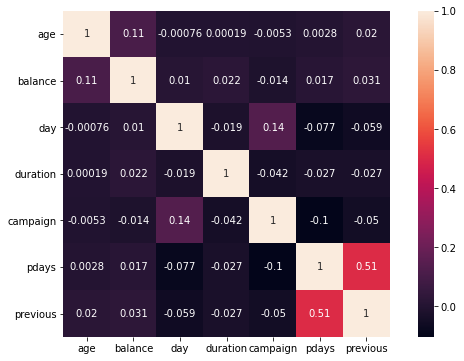

In [5]:
plt.subplots(figsize=(10,6))

sns.heatmap(bank_data.corr(),square=True,annot=True)
plt.show()

# the correlation show there is no significant correlation among the dependent varaibles except pdays and previous

## Checking for Duplicate

In [6]:
bank_data[bank_data.duplicated()]

# no duplicate record

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


## Checking and Removing Outliers

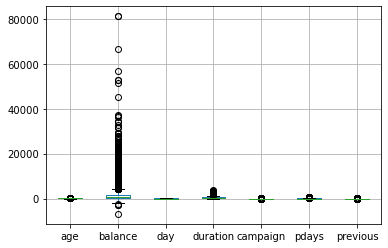

In [7]:
bank_data.boxplot()

### For Balance Field

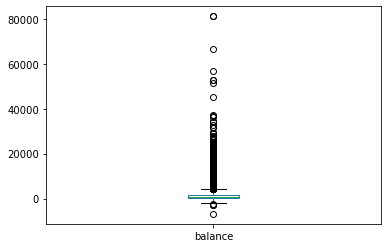

In [8]:
# Balance column

plt.subplots(figsize=(6,4))
bank_data.balance.plot(kind='box')

In [9]:
bank_data.balance.describe()  # 5 point summary

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

#### Finding Outlier using IQR method

In [10]:
balance=bank_data['balance']
Q1=np.percentile(balance,[25], interpolation='midpoint',)
Q3=np.percentile(balance,[75],interpolation='midpoint')
IQR=Q3-Q1
IQR1_5 = 1.5 * IQR
Upper_Range = Q3+IQR1_5
Lower_Range = Q1 - IQR1_5
print( 'Q1: ',Q1,'\nQ3: ',Q3,'\nIQR: ',IQR, '\n1.5 IQR: ',IQR1_5,'\nLower Range: ',Lower_Range,'\nUpper Range: ',Upper_Range )


Q1:  [122.] 
Q3:  [1708.] 
IQR:  [1586.] 
1.5 IQR:  [2379.] 
Lower Range:  [-2257.] 
Upper Range:  [4087.]


#### Dropping the outliers using IQR method

In [11]:
bank_data.drop(bank_data[bank_data['balance']> Upper_Range[0]].index,axis=0,inplace=True)
#removing the entire row the outlier

In [12]:
bank_data.drop(bank_data[bank_data['balance']<Lower_Range[0]].index,inplace=True,axis=0)


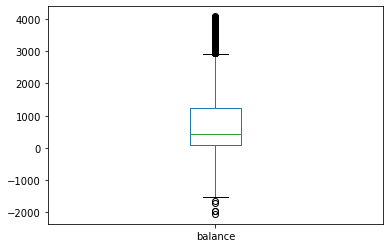

In [13]:
# after removing outliers

plt.subplots(figsize=(6,4))
bank_data.balance.plot(kind='box')

##### repeating the above process for all the fields

#### For Age field

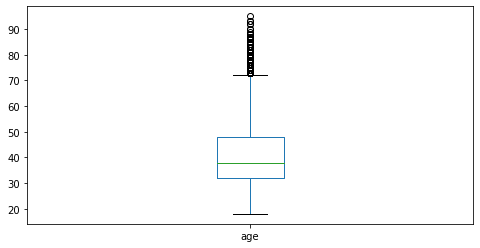

In [14]:
plt.subplots(figsize=(8,4))
bank_data.age.plot(kind='box')
plt.show()

In [15]:
bank_data.age.describe()

count    10107.000000
mean        40.897596
std         11.736322
min         18.000000
25%         32.000000
50%         38.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [16]:
age=bank_data.age
Q1=np.percentile(age,[25],interpolation='midpoint')
Q3=np.percentile(age,[75],interpolation='midpoint')
IQR=Q3-Q1
IQR1_5 = 1.5 * IQR
Upper_Range = Q3+IQR1_5
Lower_Range = Q1 - IQR1_5
print( 'Q1: ',Q1,'\nQ3: ',Q3,'\nIQR: ',IQR, '\n1.5 IQR: ',IQR1_5,'\nLower Range: ',Lower_Range,'\nUpper Range: ',Upper_Range )

Q1:  [32.] 
Q3:  [48.] 
IQR:  [16.] 
1.5 IQR:  [24.] 
Lower Range:  [8.] 
Upper Range:  [72.]


In [17]:
bank_data.drop(bank_data[bank_data['age']> Upper_Range[0]].index,axis=0,inplace=True)
#removing the entire row the outlier

bank_data.drop(bank_data[bank_data['age']<Lower_Range[0]].index,inplace=True,axis=0)

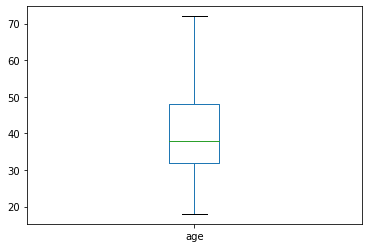

In [18]:
# after removing outliers

plt.subplots(figsize=(6,4))
bank_data.age.plot(kind='box')

#### For Day field

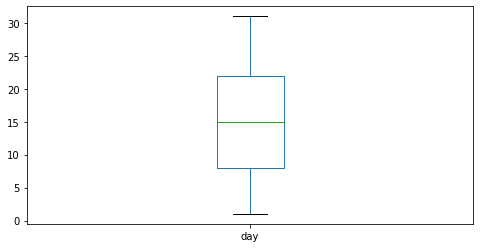

In [19]:
plt.subplots(figsize=(8,4))
bank_data.day.plot(kind='box')
plt.show()

# no outlier

#### For Duration Field

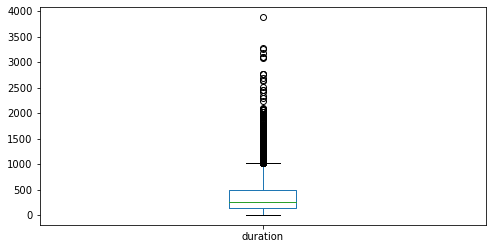

In [20]:
plt.subplots(figsize=(8,4))
bank_data.duration.plot(kind='box')
plt.show()


In [21]:
bank_data.duration.describe()

count    9932.000000
mean      369.157672
std       347.804146
min         2.000000
25%       136.000000
50%       252.000000
75%       491.250000
max      3881.000000
Name: duration, dtype: float64

In [22]:
duration=bank_data.duration
Q1=np.percentile(duration,[25],interpolation='midpoint')
Q3=np.percentile(duration,[75],interpolation='midpoint')
IQR=Q3-Q1
IQR1_5 = 1.5 * IQR
Upper_Range = Q3+IQR1_5
Lower_Range = Q1 - IQR1_5
print( 'Q1: ',Q1,'\nQ3: ',Q3,'\nIQR: ',IQR, '\n1.5 IQR: ',IQR1_5,'\nLower Range: ',Lower_Range,'\nUpper Range: ',Upper_Range )

Q1:  [136.] 
Q3:  [491.5] 
IQR:  [355.5] 
1.5 IQR:  [533.25] 
Lower Range:  [-397.25] 
Upper Range:  [1024.75]


In [23]:
bank_data.drop(bank_data[bank_data['duration']> Upper_Range[0]].index,axis=0,inplace=True)
#removing the entire row the outlier

bank_data.drop(bank_data[bank_data['duration']<Lower_Range[0]].index,inplace=True,axis=0)

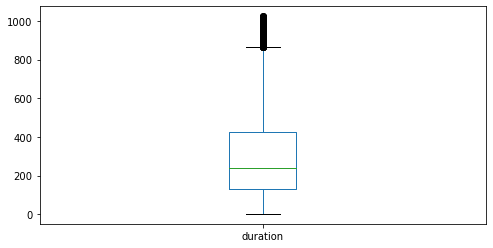

In [24]:
#after removing outliers
plt.subplots(figsize=(8,4))
bank_data.duration.plot(kind='box')
plt.show()

#### for Campaign field

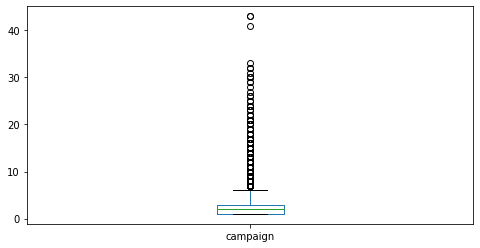

In [25]:
plt.subplots(figsize=(8,4))
bank_data.campaign.plot(kind='box')
plt.show()


In [26]:
bank_data.campaign.describe()

count    9351.000000
mean        2.513956
std         2.737850
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        43.000000
Name: campaign, dtype: float64

In [27]:
campaign=bank_data.campaign
Q1=np.percentile(campaign,[25],interpolation='midpoint')
Q3=np.percentile(campaign,[75],interpolation='midpoint')
IQR=Q3-Q1
IQR1_5 = 1.5 * IQR
Upper_Range = Q3+IQR1_5
Lower_Range = Q1 - IQR1_5
print( 'Q1: ',Q1,'\nQ3: ',Q3,'\nIQR: ',IQR, '\n1.5 IQR: ',IQR1_5,'\nLower Range: ',Lower_Range,'\nUpper Range: ',Upper_Range )

Q1:  [1.] 
Q3:  [3.] 
IQR:  [2.] 
1.5 IQR:  [3.] 
Lower Range:  [-2.] 
Upper Range:  [6.]


In [28]:
bank_data.drop(bank_data[bank_data['campaign']> Upper_Range[0]].index,axis=0,inplace=True)
#removing the entire row the outlier

bank_data.drop(bank_data[bank_data['campaign']<Lower_Range[0]].index,inplace=True,axis=0)

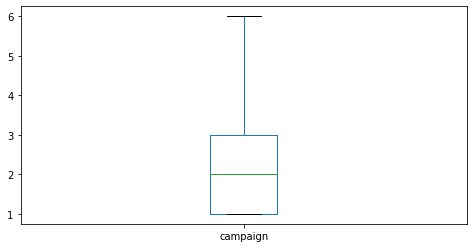

In [29]:
#after removing outliers
plt.subplots(figsize=(8,4))
bank_data.campaign.plot(kind='box')
plt.show()

#### for pdays field

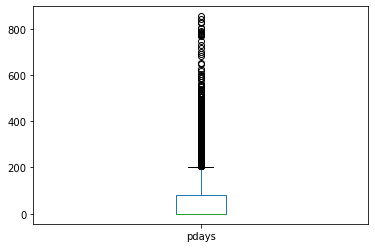

In [30]:
bank_data.pdays.plot(kind='box')

In [31]:
bank_data.pdays.describe()

count    8839.000000
mean       54.467700
std       112.547587
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        81.000000
max       854.000000
Name: pdays, dtype: float64

In [32]:
pdays=bank_data.pdays
Q1=np.percentile(pdays,[25],interpolation='midpoint')
Q3=np.percentile(pdays,[75],interpolation='midpoint')
IQR=Q3-Q1
IQR1_5 = 1.5 * IQR
Upper_Range = Q3+IQR1_5
Lower_Range = Q1 - IQR1_5
print( 'Q1: ',Q1,'\nQ3: ',Q3,'\nIQR: ',IQR, '\n1.5 IQR: ',IQR1_5,'\nLower Range: ',Lower_Range,'\nUpper Range: ',Upper_Range )

Q1:  [-1.] 
Q3:  [81.] 
IQR:  [82.] 
1.5 IQR:  [123.] 
Lower Range:  [-124.] 
Upper Range:  [204.]


In [33]:
bank_data.drop(bank_data[bank_data['pdays']> Upper_Range[0]].index,axis=0,inplace=True)
#removing the entire row the outlier

bank_data.drop(bank_data[bank_data['pdays']<Lower_Range[0]].index,inplace=True,axis=0)

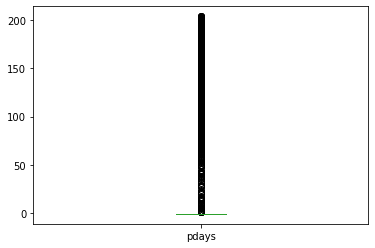

In [34]:
bank_data.pdays.plot(kind='box')

#### for Previous field

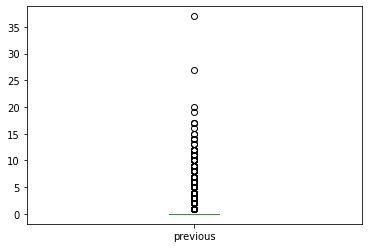

In [35]:
bank_data.previous.plot(kind='box')

In [36]:
bank_data.pdays.describe()

count    7983.000000
mean       23.552674
std        55.512987
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       204.000000
Name: pdays, dtype: float64

In [37]:
previous=bank_data.previous
Q1=np.percentile(previous,[25],interpolation='midpoint')
Q3=np.percentile(previous,[75],interpolation='midpoint')
IQR=Q3-Q1
IQR1_5 = 1.5 * IQR
Upper_Range = Q3+IQR1_5
Lower_Range = Q1 - IQR1_5
print( 'Q1: ',Q1,'\nQ3: ',Q3,'\nIQR: ',IQR, '\n1.5 IQR: ',IQR1_5,'\nLower Range: ',Lower_Range,'\nUpper Range: ',Upper_Range )

Q1:  [0.] 
Q3:  [0.] 
IQR:  [0.] 
1.5 IQR:  [0.] 
Lower Range:  [0.] 
Upper Range:  [0.]


In [38]:
# as we see that there are only a few data points in pdays that have value more that 0, and rest of them have 0 value,
# hence we will only drop the upper range value greater than 0, and will keep all 0 values only

bank_data.drop(bank_data[bank_data['pdays']> Upper_Range[0]].index,axis=0,inplace=True)
#removing the entire row the outlier

# bank_data.drop(bank_data[bank_data['pdays']<Lower_Range[0]].index,inplace=True,axis=0)

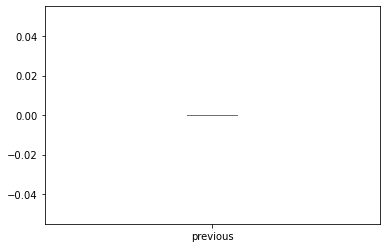

In [39]:
bank_data.previous.plot(kind='box')

In [40]:
bank_data.shape

(6488, 17)

## Data Preprocessing

In [41]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes


#### Label Encoding of categorical Fields

In [42]:
# Label Encoding the categorical data

def Encoding(bank_data):
    res_df=bank_data.copy()
    le=preprocessing.LabelEncoder()
    
    res_df['job']=le.fit_transform(res_df['job'])
    res_df['marital']=le.fit_transform(res_df['marital'])
    res_df['education']=le.fit_transform(res_df['education'])
    res_df['default']=le.fit_transform(res_df['default'])
    res_df['housing']=le.fit_transform(res_df['housing'])
    res_df['loan']=le.fit_transform(res_df['loan'])
    res_df['contact']=le.fit_transform(res_df['contact'])
    res_df['month']=le.fit_transform(res_df['month'])
    res_df['poutcome']=le.fit_transform(res_df['poutcome'])
    res_df['deposit']=le.fit_transform(res_df['deposit'])
    return res_df
    
    
    

In [43]:
encoded_df=Encoding(bank_data)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,0,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,0,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,0,1
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,0,1


### Splitting X (Independent) and Y(Dependent) variables 

In [44]:
X= encoded_df.drop('deposit',axis=1).values
Y= encoded_df['deposit'].values

### Splitting Data into Train and Test

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

### Feature Scaling

In [52]:

Standard_Scaler=StandardScaler()

X_train=Standard_Scaler.fit_transform(X_train)
X_test=Standard_Scaler.transform(X_test)



## Build Decision Tree Model

### Decision tree with Cart (Gini) 

###### Decision Tree with depth 2

In [53]:
model_dt2=DecisionTreeClassifier(random_state=1,max_depth=2)
model_dt2.fit(X_train,Y_train)
model_dt2_trainscore=model_dt2.score(X_train,Y_train)
model_dt2_testscore=model_dt2.score(X_test,Y_test)

print('Training Score: ',model_dt2_trainscore)
print('Test Score: ',model_dt2_testscore)

Training Score:  0.7657032755298652
Test Score:  0.7619414483821263


###### Decision Tree with depth 4

In [54]:
model_dt4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt4.fit(X_train,Y_train)
model_dt4_trainscore=model_dt4.score(X_train,Y_train)
model_dt4_testscore=model_dt4.score(X_test,Y_test)

print('Training Score: ',model_dt4_trainscore)
print('Test Score: ',model_dt4_testscore)

# depth 4 shows overfitting as test score has reduced even though the training score has improved 

Training Score:  0.7830443159922928
Test Score:  0.765793528505393


###### Decision Tree with depth 6

In [55]:
model_dt6=DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt6.fit(X_train,Y_train)
model_dt6_trainscore=model_dt6.score(X_train,Y_train)
model_dt6_testscore=model_dt6.score(X_test,Y_test)

print('Training Score: ',model_dt6_trainscore)
print('Test Score: ',model_dt6_testscore)


Training Score:  0.8364161849710983
Test Score:  0.8204930662557781


###### Decision Tree with depth 8

In [56]:
model_dt8=DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt8.fit(X_train,Y_train)
model_dt8_trainscore=model_dt8.score(X_train,Y_train)
model_dt8_testscore=model_dt8.score(X_test,Y_test)

print('Training Score: ',model_dt8_trainscore)
print('Test Score: ',model_dt8_testscore)

# depth 4 shows overfitting as test score has reduced even though the training score has improved 

Training Score:  0.869942196531792
Test Score:  0.8212634822804314


###### Decision Tree with depth 10

In [57]:
model_dt10=DecisionTreeClassifier(random_state=1,max_depth=10)
model_dt10.fit(X_train,Y_train)
model_dt10_trainscore=model_dt10.score(X_train,Y_train)
model_dt10_testscore=model_dt10.score(X_test,Y_test)

print('Training Score: ',model_dt10_trainscore)
print('Test Score: ',model_dt10_testscore)

# depth 4 shows overfitting as test score has not imporved so much even though the training score has improved by a good margin

Training Score:  0.9077071290944123
Test Score:  0.8235747303543913


In [ ]:
# Here we see that with depth 6 we are getting optimum results, so we select that.

### Decision Tree with c4.5 (Entropy)

In [58]:
# now we check the decision tree with C4.5 method


model_dt = DecisionTreeClassifier(max_depth=6,criterion='entropy',random_state=1)

model_dt.fit(X_train, Y_train)

model_dt_trainscore=model_dt.score(X_train,Y_train)
model_dt_testscore= model_dt.score(X_test,Y_test)



print('Training Score: ',model_dt_trainscore)
print('Test Score: ',model_dt_testscore)

# Decision Tree with CART(Gini) method gives a slightly better score, hence we'll go with that and notc4.5(entropy)

Training Score:  0.8342967244701349
Test Score:  0.8166409861325116


### Predicting test data with Decision Tree using CART (Gini)

In [59]:
Y_pred=model_dt6.predict(X_test)

## Confusion Matrix

[[720 126]
 [107 345]]


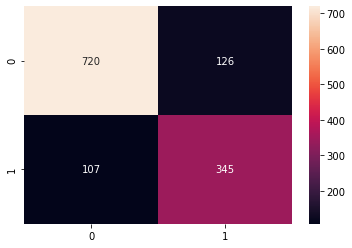

In [60]:
conf_matrix= confusion_matrix(Y_test,Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True,fmt='2g')

### Classification Report

In [61]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       846
           1       0.73      0.76      0.75       452

    accuracy                           0.82      1298
   macro avg       0.80      0.81      0.80      1298
weighted avg       0.82      0.82      0.82      1298



In [62]:
print('Accuracy: ',metrics.accuracy_score(Y_test,Y_pred))
print('Precision: ',metrics.precision_score(Y_test,Y_pred) )
print('Recall: ', metrics.recall_score(Y_test,Y_pred))
print('F1-Score: ', metrics.f1_score(Y_test,Y_pred))

Accuracy:  0.8204930662557781
Precision:  0.732484076433121
Recall:  0.7632743362831859
F1-Score:  0.7475622968580715


## ROC and AUC Curve

In [63]:
Y_pred_prob=model_dt6.predict_proba(X_test)[::,1]
fpr,tpr,threshold_value=roc_curve(Y_test, Y_pred_prob)
auc_score=metrics.roc_auc_score(Y_test,Y_pred_prob)
# auc_score=auc(fpr,tpr)   this can also be used to calculate auc score


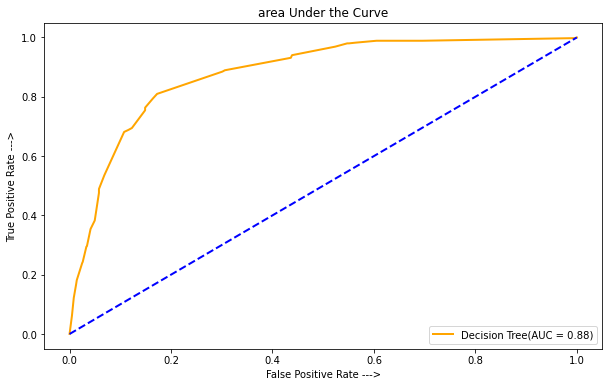

In [64]:
plt.subplots(figsize=(10,6))

plt.plot(fpr,tpr,color='orange',lw=2,label='Decision Tree(AUC = %0.2f)'%auc_score)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')

plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title("area Under the Curve")
plt.legend(loc="lower right")
plt.show()